In [6]:
source("/home/mnl/Statistik/masterthesis/code/modify_compute_elastic_mean.R")
set.seed(18)

# Elastic Procrustes Means
Means are calculated for some simulated and real world datasets.

#### Define functions for rotating and scaling curves

In [7]:
rand.rotate <- function(x){
  # rotate dataframe of 2D vectors randomly
  theta <- 2*pi*runif(1)
  mat <- matrix(c(cos(theta), sin(theta), -sin(theta), cos(theta)), nrow = 2, ncol = 2)
  x.rot <- as.matrix(x) %*% t(mat)
  as.data.frame(x.rot)
}
rand.scale <- function(x){
  # scale dataframe of 2D vectors randomly
  beta <- 0.5 + 0.5*runif(1)
  beta * x
}

### Datasets

#### Simulated spirals with random rotation and scaling

In [8]:
curve <- function(t){
  rbind(t*cos(13*t), t*sin(13*t))
}

data_curves <- lapply(1:4, function(i){
  m <- sample(10:15, 1)
  delta <- abs(rnorm(m, mean = 1, sd = 0.05))
  t <- cumsum(delta)/sum(delta)
  data.frame(t(curve(t)) + 0.07*t*matrix(cumsum(rnorm(2*length(delta))), ncol = 2))
})


data_curves <- lapply(data_curves, rand.rotate)
data_curves <- lapply(data_curves, rand.scale)
data_curves <- lapply(data_curves, center_curve)

#### Digits3 dataset

In [12]:
d3_curves <- shapes::digit3.dat
d3_curves <- apply(d3_curves, MARGIN = 3, FUN = function(i){
  data.frame(X1 = i[,1], X2 = i[,2])
})
d3_curves <- lapply(d3_curves, center_curve)

### Calculate Elastic Procrustes Means
#### Simulated Spirals

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coeff

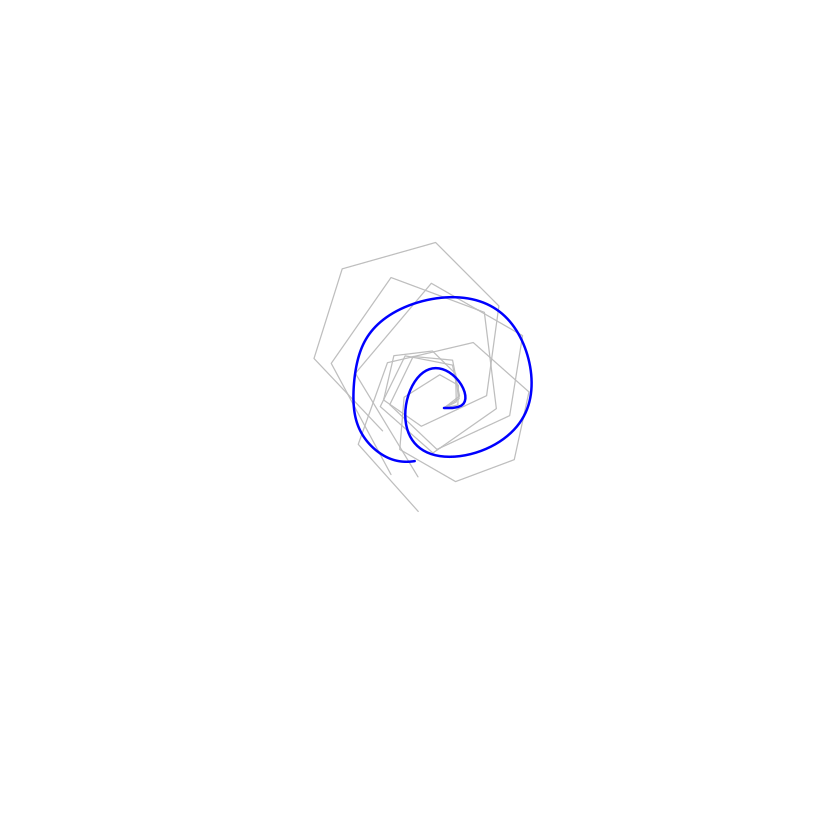

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

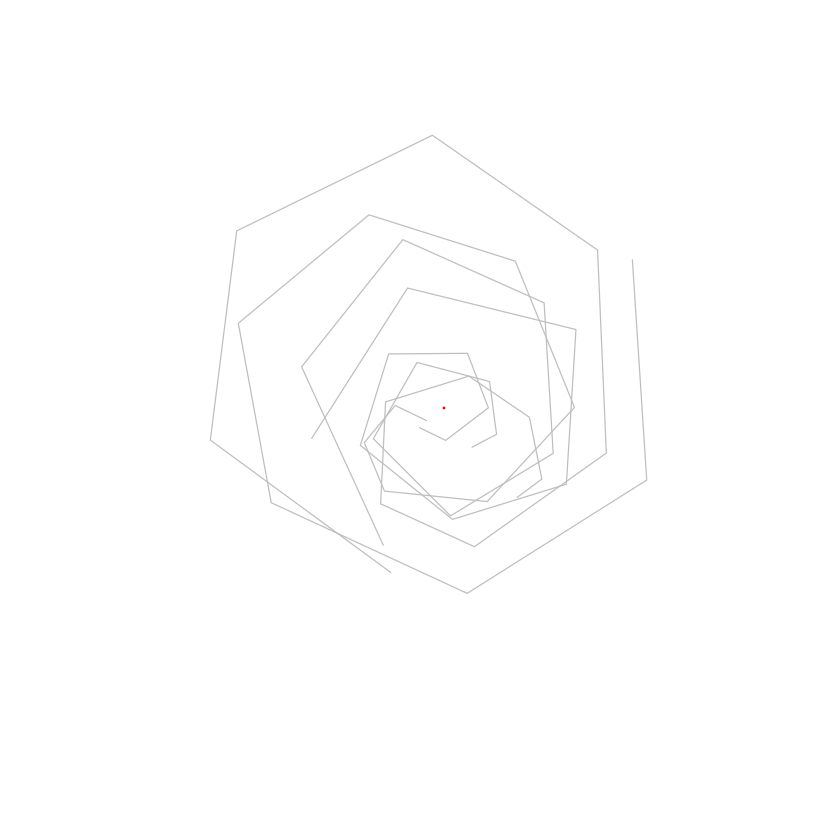

In [10]:
knots <- seq(0,1, length = 11)
smooth_elastic_mean <- compute_elastic_mean(data_curves, knots = knots)

#plot result
plot.new( )
plot.window( xlim=c(-1,1), ylim=c(-1,1), asp = 1)
lapply(data_curves, lines, col = "gray")
lines(get_evals(smooth_elastic_mean), type = "l", col = "red", lwd = 2)

#### Digits3

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coeff

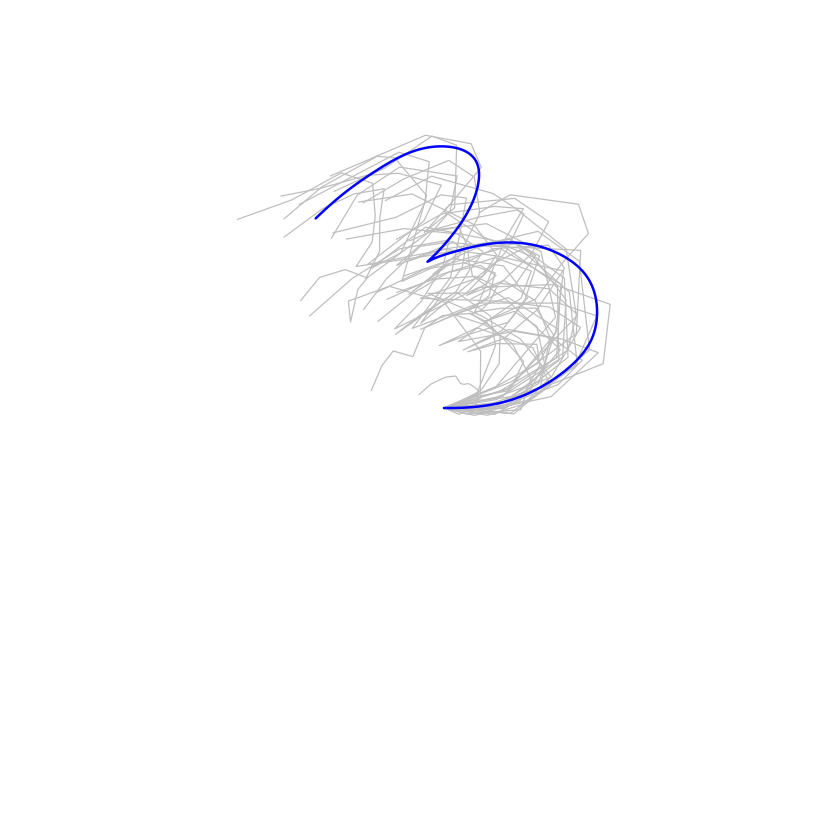

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

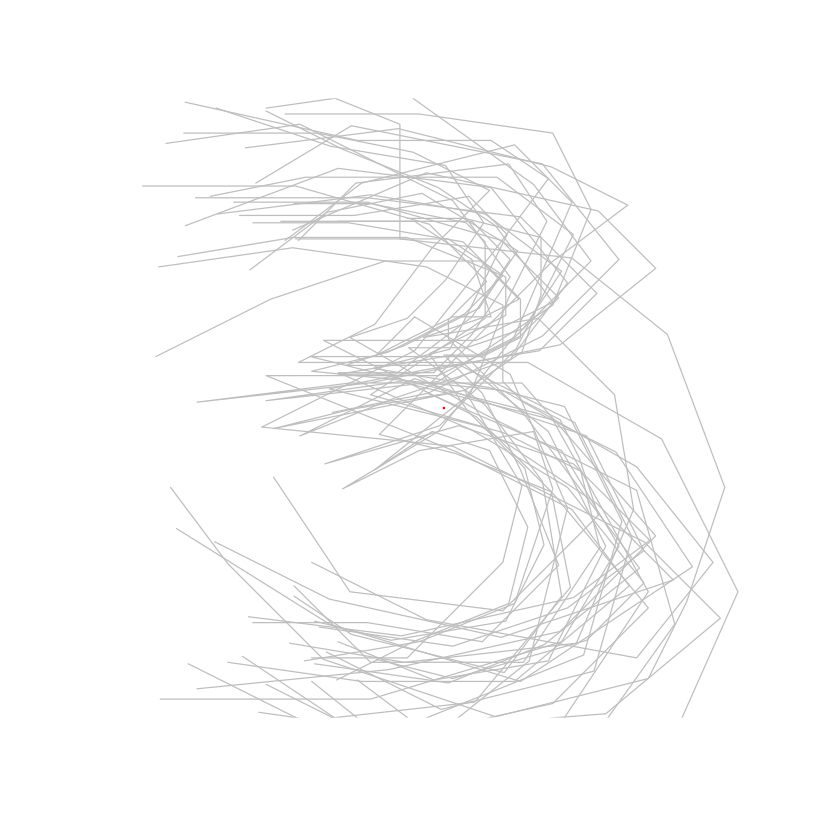

In [13]:
knots <- seq(0,1, length = 30)
smooth_elastic_mean <- compute_elastic_mean(d3_curves, knots = knots)

#plot result
plot.new( )
plot.window( xlim=c(-15,15), ylim=c(-15,15), asp = 1)
lapply(d3_curves, lines, col = "gray")
lines(get_evals(smooth_elastic_mean), type = "l", col = "red", lwd = 2)